In [1]:
# installing ggbiplot package
# library(devtools)
# install_github("vqv/ggbiplot")

In [2]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.4. Sociodemographic Clustering/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.4. Sociodemographic Clustering/Output')
cur_date = "010923"

#library(ggbiplot)
library(readxl)
library(tidyverse)
#library(reshape2)
library(Hmisc)
library(factoextra)

# reading in files
acs_whp_df = data.frame(read_excel("010923_Imputed_ACS_WHP_Data.xlsx")) %>%
    # removing uneeded variables
    select(-c("Avg_ACRES", "Wildfire_Hazard_Potential_Quintile_Percentage")) 
# converting quintile col into a character
acs_whp_df$Wildfire_Hazard_Potential_Quintile_Number = as.character(acs_whp_df$Wildfire_Hazard_Potential_Quintile_Number)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [3]:
head(acs_whp_df)

,GEO_ID,Census_Tract,County,Wildfire_Hazard_Potential_Mean,Wildfire_Hazard_Potential_Quintile_Number,Sex_Ratio,Median_Age,Population_Under_18,Population_Over_18,Population_Over_65,⋯,Less_than_High_School,High_School_Education,Some_College,College_Education,Employed,Employed_Male,Employed_Female,Full_Time_Work,Part_Time_Work,No_Work
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201.00,Alamance,92.23704,1,87.2,37.3,21.9,78.1,15.1,⋯,40.7,30.1,21.1,0.9,13.9,9.9,17.7,5.4,32.1,28.1
2,14000US37001020200,202.00,Alamance,92.23704,1,78.3,31.0,29.1,70.9,11.2,⋯,32.6,40.0,18.9,12.4,22.5,20.5,24.3,10.6,43.1,43.0
3,14000US37001020300,203.00,Alamance,92.23704,1,77.8,40.7,27.1,72.9,18.9,⋯,37.3,5.9,22.6,4.6,10.3,6.0,14.4,3.9,27.5,32.7
4,14000US37001020400,204.00,Alamance,92.23704,1,78.1,30.5,31.4,68.6,10.1,⋯,39.3,25.3,16.3,5.4,18.9,16.7,20.4,10.9,35.1,38.3
5,14000US37001020501,205.01,Alamance,92.23704,1,92.7,35.1,23.3,76.7,15.6,⋯,6.1,14.9,3.5,1.5,5.4,1.3,9.7,1.5,24.0,14.5
6,14000US37001020502,205.02,Alamance,92.23704,1,99.0,32.1,30.0,70.0,8.9,⋯,26.6,29.9,10.8,5.2,10.0,5.9,15.9,2.2,33.5,41.4


This analysis will use PCA & k means to explore 2 research questions:
1. Is there is an association between sociodemographic variables and wildfire hazard potential?
2. Do certain sociodemographic variables cluster more closely together?

# Principal Component Analysis (PCA)
First using PCA to see if and how the WHP quintiles cluster based on the compressed variance or data for the sociodemographic variables.

In [4]:
# prepping df
# removing variables that were not very relevant to WHP (ie. Sex Ratio)
sociodemographic_pca_prep_df = acs_whp_df[,c(1,7:43)] %>%
#     select(-c("Poverty_Female", "Poverty_Male", "Poverty_Adult", "Poverty_Children", "English_Speakers_Only", 
#               "Population_Over_18", "Population_Over_65", "Hispanic_Latino", "Sex_Ratio")) %>%
    column_to_rownames(var = "GEO_ID")

# psudeo log transforming makes the data have a more a normal distribution
# it also centers and scales the data, which is necessary for PCA

#sociodemographic_pca_prep_df = log2(sociodemographic_pca_prep_df + 1) 

head(sociodemographic_pca_prep_df)

,Median_Age,Population_Under_18,Population_Over_18,Population_Over_65,Race_White,Race_Black,Race_Indigenous,Race_Asian,Race_Other,Race_Mixed,⋯,Less_than_High_School,High_School_Education,Some_College,College_Education,Employed,Employed_Male,Employed_Female,Full_Time_Work,Part_Time_Work,No_Work
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14000US37001020100,37.3,21.9,78.1,15.1,61.0,28.5,0.3,1.8,6.5,1.9,⋯,40.7,30.1,21.1,0.9,13.9,9.9,17.7,5.4,32.1,28.1
14000US37001020200,31.0,29.1,70.9,11.2,51.9,29.2,0.9,4.4,11.7,1.8,⋯,32.6,40.0,18.9,12.4,22.5,20.5,24.3,10.6,43.1,43.0
14000US37001020300,40.7,27.1,72.9,18.9,45.2,28.9,0.0,0.0,23.1,2.9,⋯,37.3,5.9,22.6,4.6,10.3,6.0,14.4,3.9,27.5,32.7
14000US37001020400,30.5,31.4,68.6,10.1,19.6,59.0,0.2,0.0,19.9,1.4,⋯,39.3,25.3,16.3,5.4,18.9,16.7,20.4,10.9,35.1,38.3
14000US37001020501,35.1,23.3,76.7,15.6,76.1,13.3,0.0,1.4,8.3,0.8,⋯,6.1,14.9,3.5,1.5,5.4,1.3,9.7,1.5,24.0,14.5
14000US37001020502,32.1,30.0,70.0,8.9,40.7,35.7,0.0,2.3,15.1,6.2,⋯,26.6,29.9,10.8,5.2,10.0,5.9,15.9,2.2,33.5,41.4


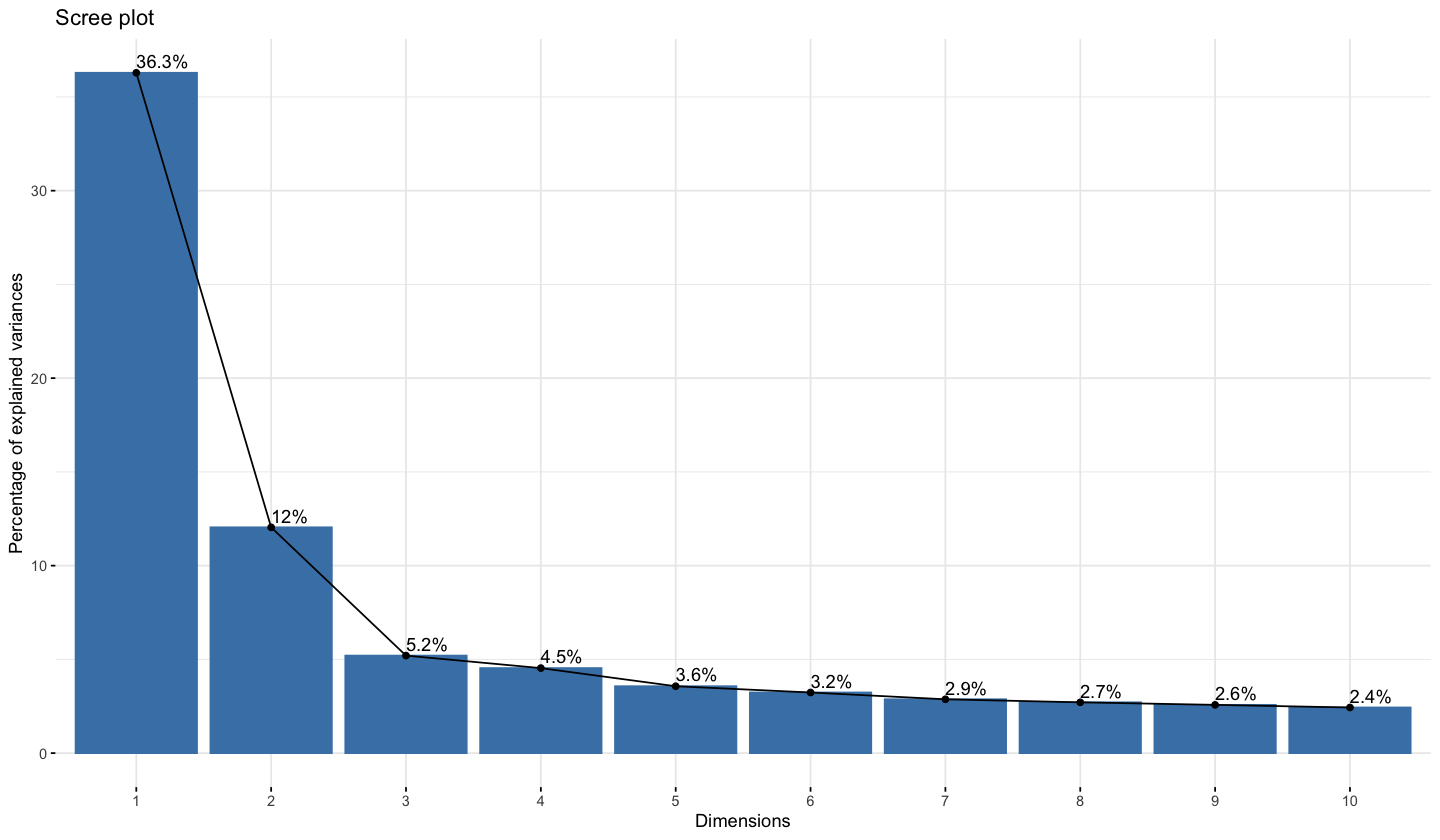

In [5]:
# running pca 
pca_sociodemographic_data = prcomp(sociodemographic_pca_prep_df, scale = TRUE, center = TRUE)

# looking a scree plot to see how much of the variance was captured in first 2 eigenvectors
options(repr.plot.width = 12, repr.plot.height = 7) #changing size
fviz_eig(pca_sociodemographic_data, addlabels = TRUE)

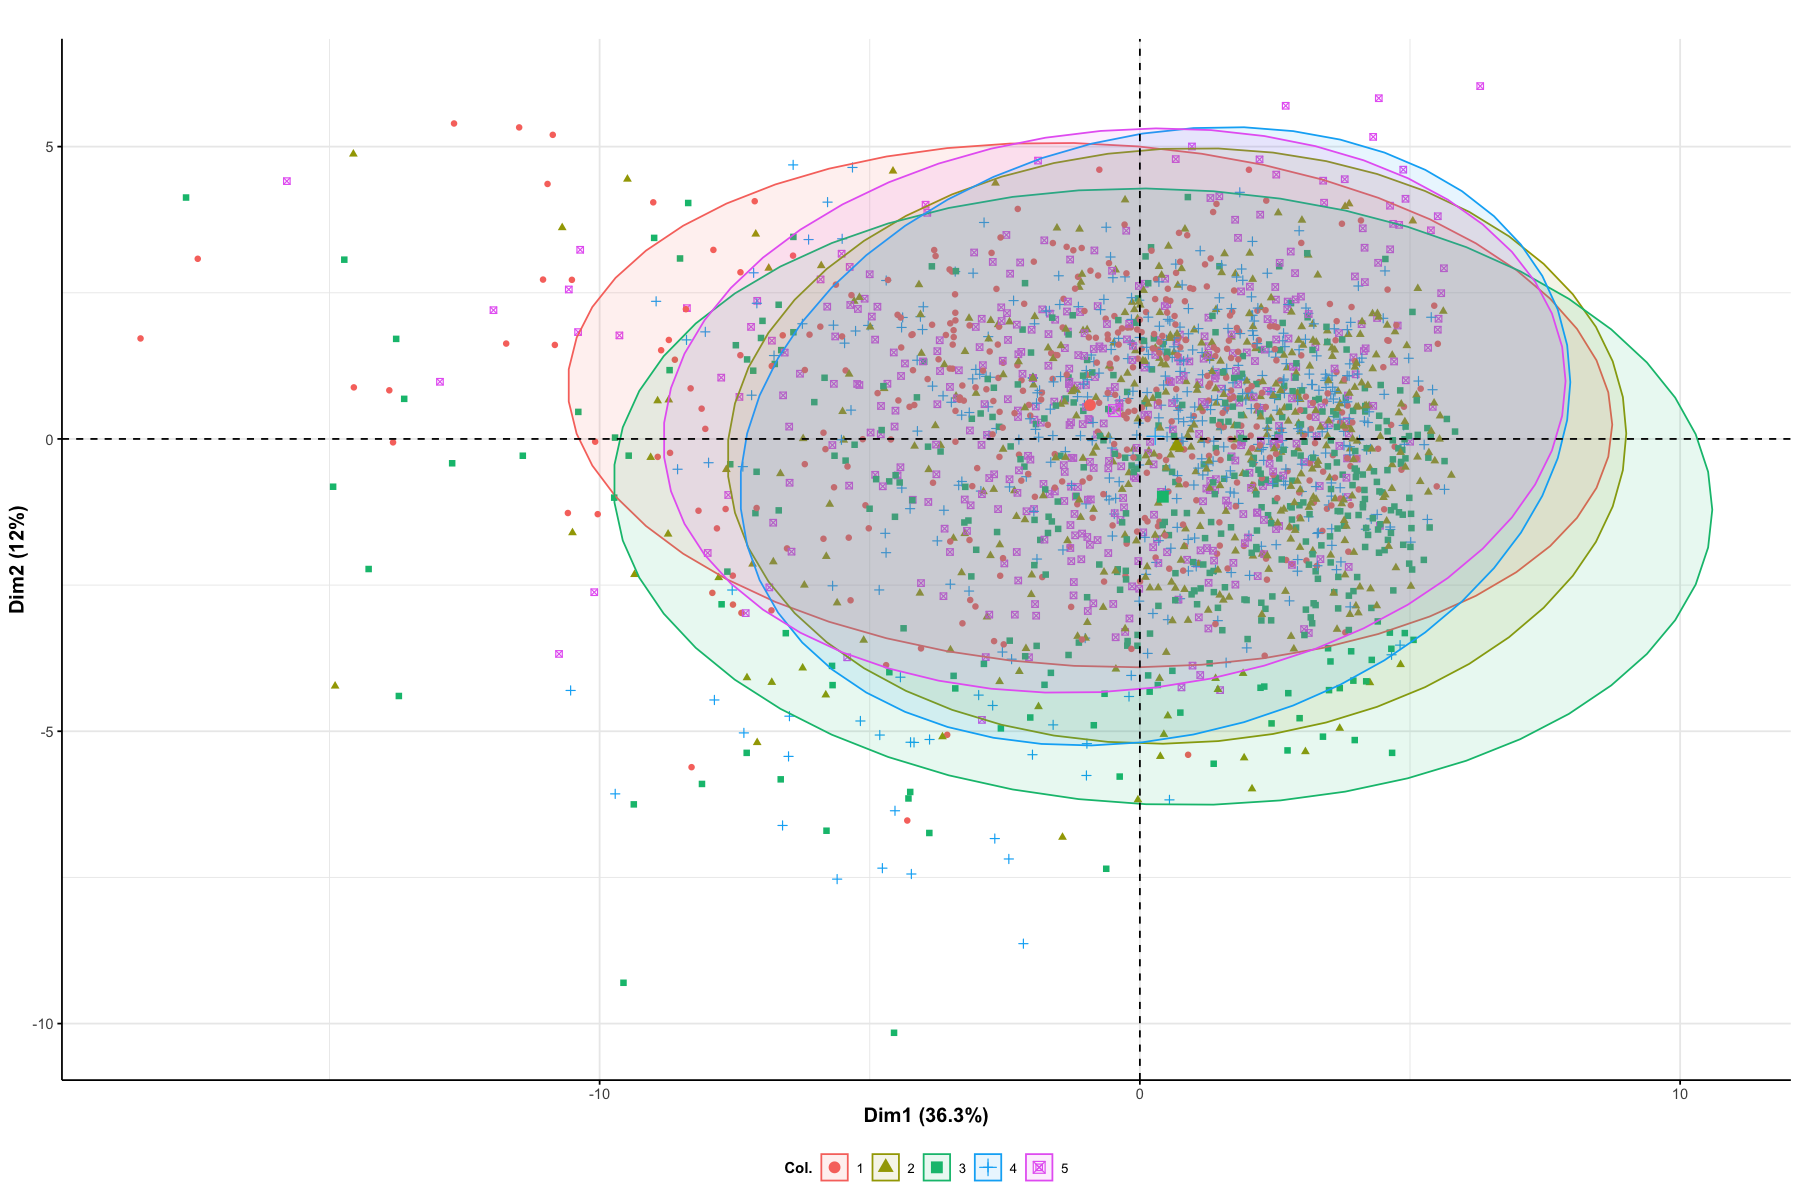

In [6]:
# visualizing all data to detect outlier subjects
options(repr.plot.width = 15, repr.plot.height = 10) #changing size
fviz_pca_ind(pca_sociodemographic_data, geom.ind = "point", # removes geo ids
             # coloring by WHP quintile
             col.ind = factor(as.character(acs_whp_df$Wildfire_Hazard_Potential_Quintile_Number)), 
             #adding 95% confidence ellipses for each group
             addEllipses = TRUE, # Concentration ellipses
             #ellipse.type = "confidence", # now making them concentration ellipses
             repel = TRUE, title = "") +
theme(axis.line = element_line(colour = "black"), # making x and y axes black
      legend.title = element_text(size = 9, face = "bold"),
      legend.text = element_text(size = 8),
      legend.position = 'bottom',
      axis.title = element_text(face = "bold", size = rel(1.1))) # changes axis titles

Now visualizing contributions of each variable on the first two eigenvectors. Arrows that are closer together mean that they are more highly correlated. The longer the arrow/ the lighter the color, the greater the variable's contribution or weight to the eigenvector's variance.

Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


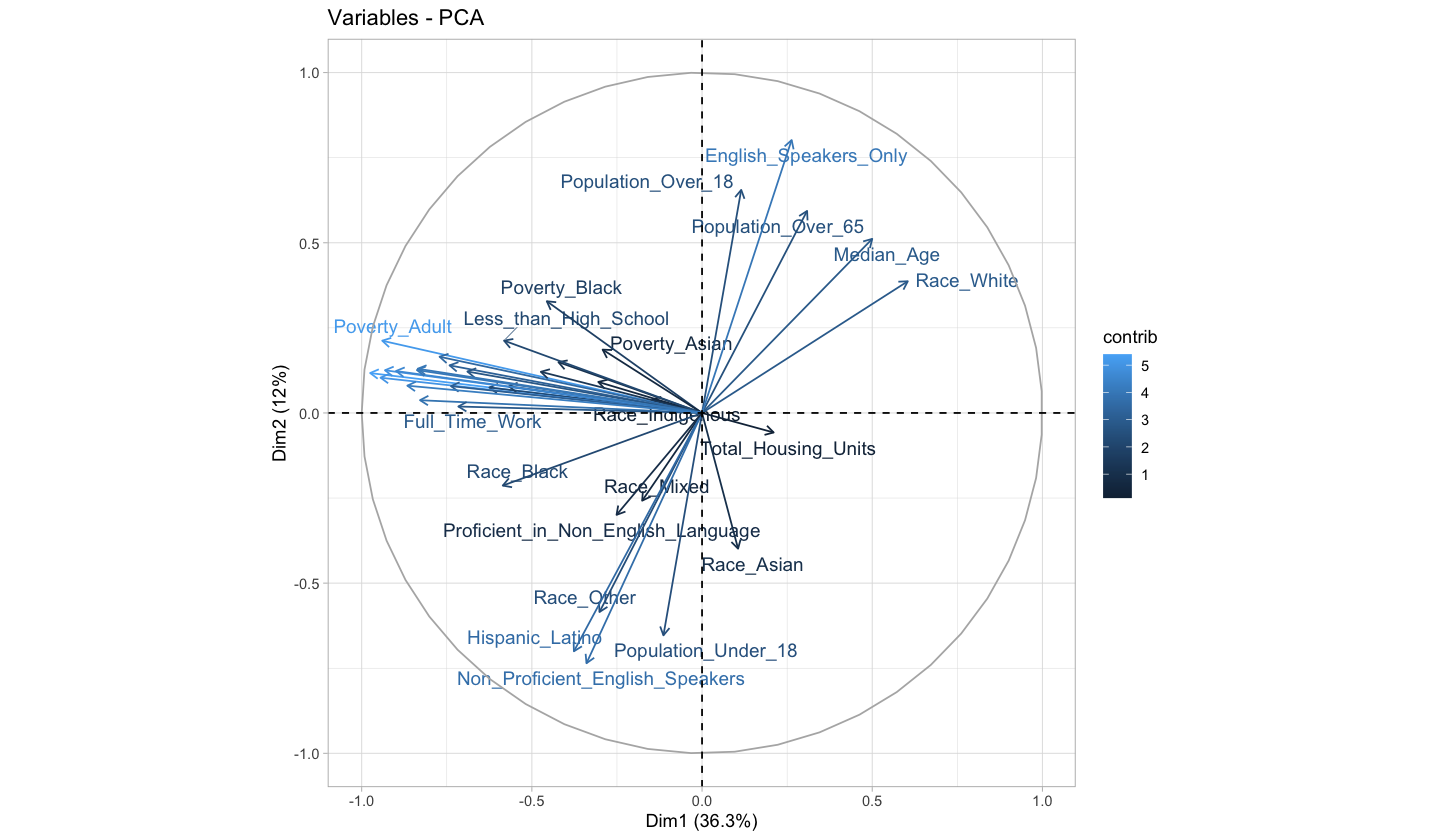

In [7]:
options(repr.plot.width=12, repr.plot.height=7) #changing size
# choosing colors
#brewer_colors = brewer.pal(10, "PuOr")

fviz_pca_var(pca_sociodemographic_data, col.var = "contrib", repel = TRUE) +
  #xlab('Dimension 1 (69%)') + ylab('Dimension 2 (10%)') + #changing axis labels
  theme_light() #+ 

#  # changing colors
#  scale_color_gradient2(name = "Contribution", low = brewer_colors[1], mid = "white", high = brewer_colors[10], 
#                       midpoint = 25) 

PC1 is positively correlated with a higher White population, Asian population, median age, population over 18 and 65, and English speaking population. PC1 is negatively correlated with a higher hispanic/ latino population, people of color (POC) population, and a greater percentage of the population in poverty. 

It's hard to see everything at the bottom, so I made a bar chart below that contains the same information. However, it only shows contributions from the first eigenvector.

In [8]:
loadings = data.frame(pca_sociodemographic_data$rotation) %>%
  rownames_to_column(var = "Variable") %>%
  select(Variable, PC1, PC2) %>%
  pivot_longer(cols = c("PC1", "PC2"), names_to = "PC", values_to = "Loading") %>%
  # adding an additional bogus col for the later heat map to work
  mutate(Category = "Variable")

head(loadings)

Variable,PC,Loading,Category
<chr>,<chr>,<dbl>,<chr>
Median_Age,PC1,0.13648532,Variable
Median_Age,PC2,0.24230962,Variable
Population_Under_18,PC1,-0.03096267,Variable
Population_Under_18,PC2,-0.30954162,Variable
Population_Over_18,PC1,0.03142245,Variable
Population_Over_18,PC2,0.31046611,Variable


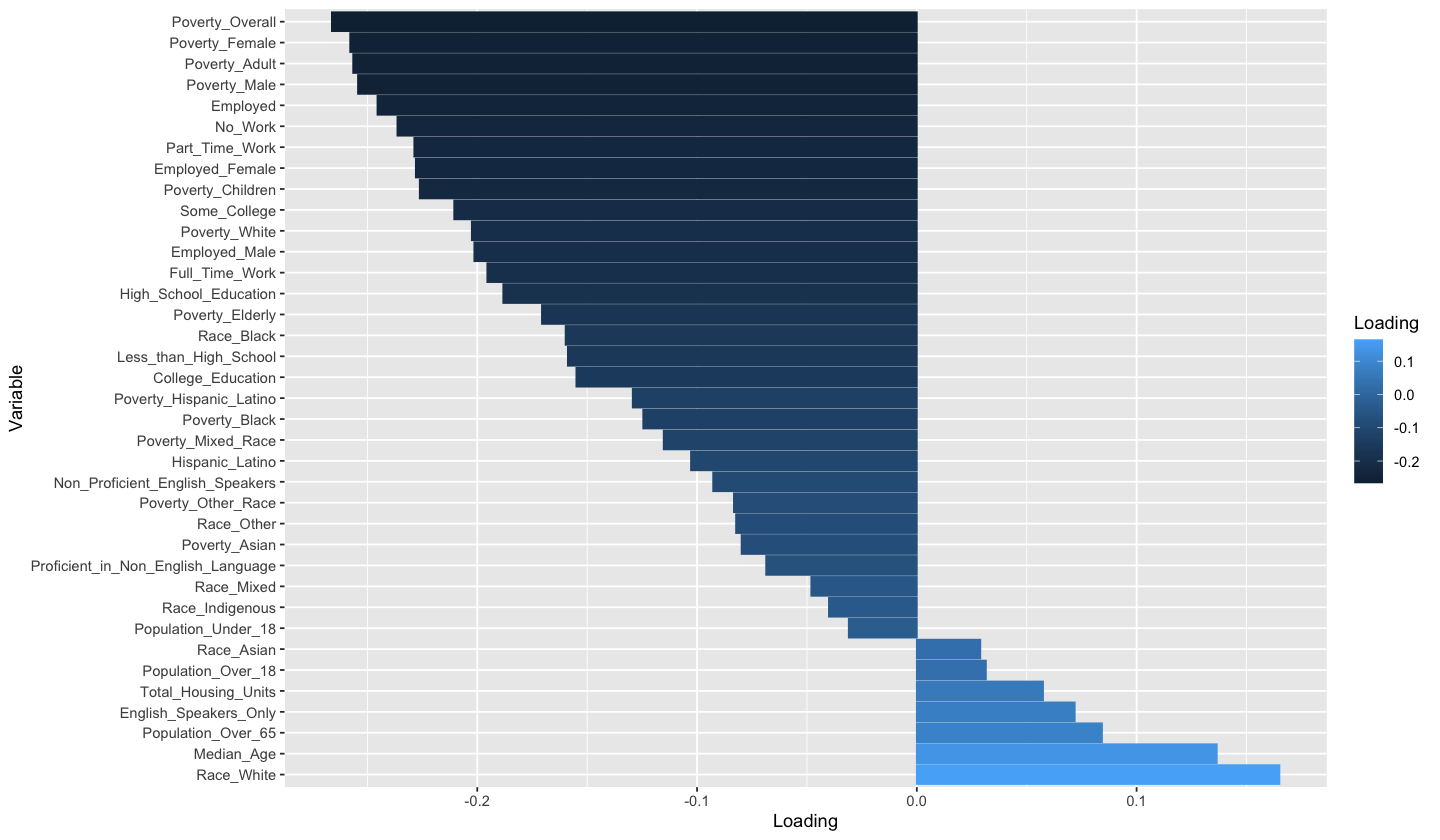

In [9]:
ggplot(loadings %>%
         #filtering for PC1 
         filter(PC == "PC1"), 
       aes(y = reorder(Variable, -Loading), x = Loading, color = Loading, fill = Loading)) + 
  geom_bar(stat = "identity") + 

#   # changing color
#   scale_color_gradient2(low = brewer_colors[1], mid = "white", high = brewer_colors[10]) +
#   scale_fill_gradient2(low = brewer_colors[1], mid = "white", high = brewer_colors[10]) +
   ylab("Variable")

It's hard to see what clusters if any are present, so I'll see if some of those outlier GEO ids can be removed so the clusters can be more easily seen. 

In [36]:
outlier_detection = function(pca_df){
    # """
    # Creating a scoring function for to detect PCA subject outliers. 
    # :param (input): PCA df (df)
    # :output: outlier names
    # """
    
    # getting scores
    scores = pca_df$x[,1:2]
    # identifying samples that are > 6 standard deviations away from the mean
    outlier_indices = apply(scores, 2, function(x) which( abs(x - mean(x)) > (6 * sd(x)) )) %>%
        Reduce(union, .)
    # getting sample names
    outliers = rownames(scores)[outlier_indices]
    
    return(outliers)
}

# calling fn
id_outliers = outlier_detection(pca_sociodemographic_data)
id_outliers

character(0)

In [15]:
# removing those 6 outliers 
`%notin%` <- Negate(`%in%`)

removed_outliers_df = sociodemographic_pca_prep_df %>%
    filter(row.names(sociodemographic_pca_prep_df) %notin% id_outliers)
head(removed_outliers_df)

,Sex_Ratio,Median_Age,Population_Under_18,Population_Over_18,Population_Over_65,Race_White,Race_Black,Race_Indigenous,Race_Asian,Race_Other,⋯,Poverty_Adult,Poverty_Elderly,Poverty_Male,Poverty_Female,Poverty_Black,Poverty_Asian,Poverty_Other_Race,Poverty_Mixed_Race,Poverty_Hispanic_Latino,Poverty_White
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14000US37001020100,87.2,37.3,21.9,78.1,15.1,61.0,28.5,0.3,1.8,6.5,⋯,20.8,14.6,26.4,28.0,54.8,0.000,45.3,0.0,31.3,13.9
14000US37001020200,78.3,31.0,29.1,70.9,11.2,51.9,29.2,0.9,4.4,11.7,⋯,33.0,19.2,27.3,37.8,44.6,0.000,0.0,82.7,16.2,39.0
14000US37001020300,77.8,40.7,27.1,72.9,18.9,45.2,28.9,0.0,0.0,23.1,⋯,17.3,22.0,18.0,28.3,21.0,31.302,10.9,36.4,26.7,20.1
14000US37001020400,78.1,30.5,31.4,68.6,10.1,19.6,59.0,0.2,0.0,19.9,⋯,26.8,14.0,30.0,33.3,19.9,22.276,69.0,100.0,67.2,26.6
14000US37001020501,92.7,35.1,23.3,76.7,15.6,76.1,13.3,0.0,1.4,8.3,⋯,12.2,7.1,12.3,14.8,18.9,0.000,0.0,53.1,25.7,10.0
14000US37001020502,99.0,32.1,30.0,70.0,8.9,40.7,35.7,0.0,2.3,15.1,⋯,22.3,19.2,17.7,31.0,27.8,100.000,14.2,19.5,14.7,25.0


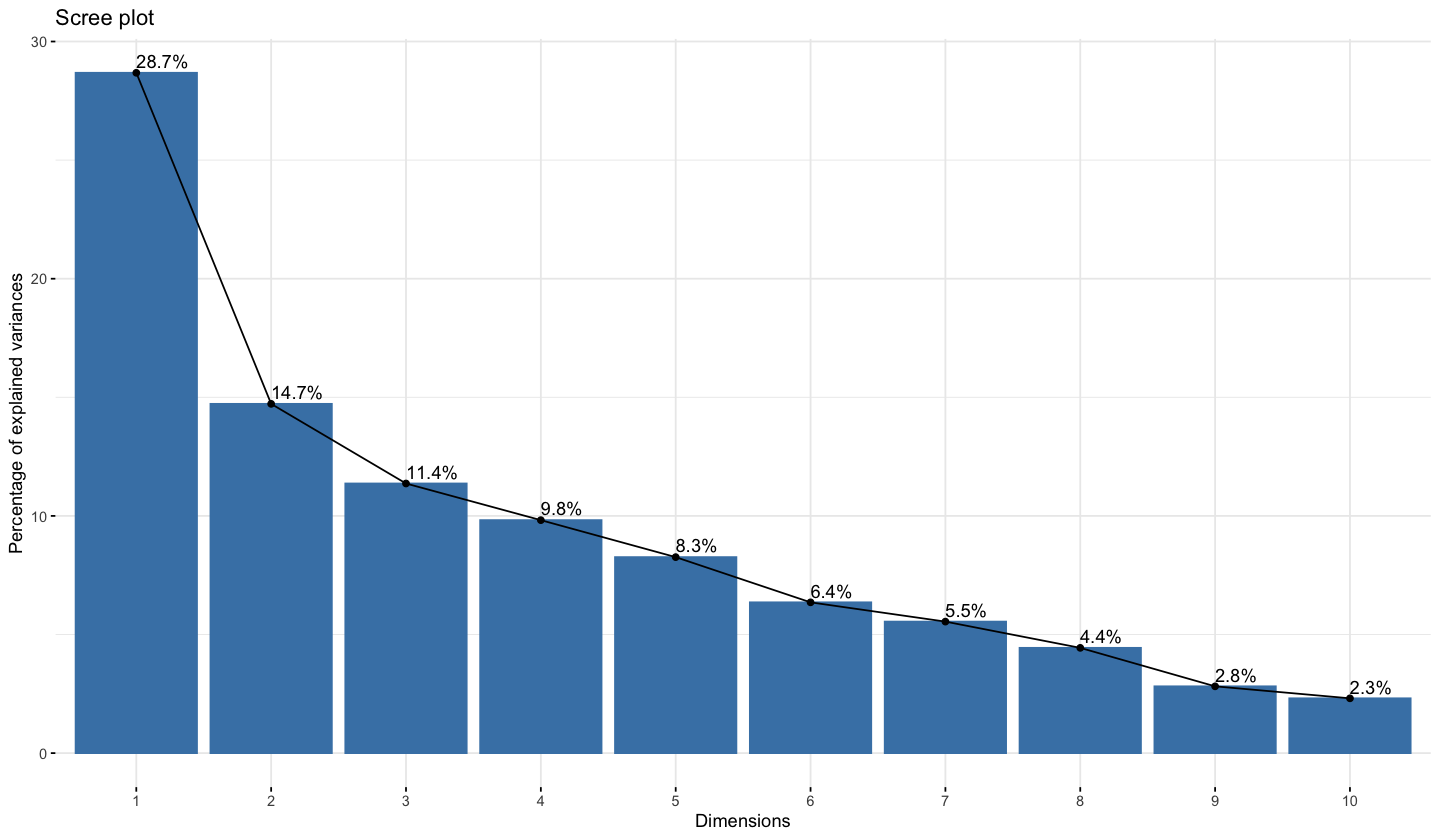

In [16]:
# rerunning PCA
removed_outliers_pca_sociodemographic_data = prcomp(removed_outliers_df)

# looking a scree plot to see how much of the variance was captured in first 2 eigenvectors
options(repr.plot.width = 12, repr.plot.height = 7) #changing size
fviz_eig(removed_outliers_pca_sociodemographic_data, addlabels = TRUE)